# Capstone Project - SETTING UP A NEW COFFEE SHOP IN LOS ANGELES
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [1.Introduction](#introduction)
* [2.Data](#data)
* [3.Methodology](#methodology)
* [4.Results & Discussion](#results)
* [5.Conclusion](#conclusion)

## 1.Introduction <a name="introduction"></a>

**Coffee** is one of those drinks that a lot of people can’t do without. A good portion of the public starts their day with coffee, and many of them continue to drink it well past lunchtime and all through the day.   
According to the National Coffee Association USA, more than 450 million cups of coffee are consumed in the United States every day, and as much as 63% of American adults drink coffee daily.   
People have their coffee in two ways: making their coffee at home or going to a coffee shop. There are a lot of reasons people love to go to the coffee shop. Apart from getting a cup of coffee with the high-quality ingredients, best brewing recipes, consistency, fresh and appealing sweet & savory selections, people want to go to coffee houses because they want to meet up or gossip with their friends, do some work, read a book, entertain or simply to pass some time. Consequently, **many businesses want to open a new coffee shop or expand their coffeehouse chain in the future.** 
  
Opening a coffee shop can be extremely profitable if we do it right. The success of a coffee shop depends on many factors, and its location is one of them. In this project, we focus solely on the **Los Angeles** metropolitan area because it is also the most populated city in California. Being home and the workplace to many people, Los Angeles is considered a good place to start this business. However, **“which neighborhoods in Los Angeles should a new coffee shop be located ?”**
  
In this project, data science methodology and one of the machine learning techniques (clustering) are used to assist our contractors/clients in finding a matching neighborhood to open a new coffee shop.


## 2.Data <a name="data"></a>

There are two datasets in the project: neighborhoods in Los Angeles dataset and Foursquare venue dataset. 
  
The neighborhoods in Los Angeles dataset is scrapped directly from the **Wikipedia website** while the Foursquare venue dataset is crawled directly from **Foursquare API**. 

#### Importing the necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import folium # map rendering library
import re
import geocoder

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported.')

Libraries imported.


#### Geting neighborhoods in Los Angeles from Wikipedia 

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_in_Los_Angeles'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
neigh = []
a_tags = soup.select("a[href*=wiki]")
#print(soup.prettify())

In [3]:
neigh = []
a_tags = soup.select("a[href*=wiki]")
count = 0
for link in a_tags:
    s = link.get('title')
    count +=1
    if count == 1 or count == 2:
        continue
    neigh.append(s)
    # Stopping the loop after getting the last neighborhood 
    if s == 'Yucca Corridor, Los Angeles':
        break       

In [4]:
#creating a list of wikipedia link for each neighborhood for future scraping 
neigh_ =  ['https://en.wikipedia.org/wiki/' + ne.replace(' ','_') for ne in neigh]

#### Defining 2 functions to get latitude and longtitude for each neighborhood
- find_lat_long1() : go to each wiki webpage of each neighborhood and then scrape the webpage to get its latitude and longtitude.
- find_lat_long2() : using geocoder to getthe  latitude and longtitude if find_lat_long1() get a error.

In [5]:
def find_lat_long1(url):
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)
    pattern = re.compile(r'lat')
    a = soup.find(text=pattern).__dict__
    lat = str(a['parent']).split("wgCoordinates")[1].split(',')[0]
    long = str(a['parent']).split("wgCoordinates")[1].split(',')[1]
    lat = re.findall(r'\d+', lat)
    long= re.findall(r'\d+', long)
    latitude = float(str(lat[0]) + '.'+ str(lat[1]))
    longtitude = float(str(long[0]) + '.'+ str(long[1])) * -1
    return latitude, longtitude
def find_lat_long2(neigh):
    lat_lng = None
    while lat_lng == None:
        g = geocoder.arcgis(neigh)
        lat_lng = g.latlng
        return lat_lng

#### Getting latitude and longtitude for each neighborhood

In [6]:
neigborhood = []
latitude = []
longitude = []
count = 0 
neigh_LA = pd.DataFrame(columns = ['Neighborhood','Latitude', 'Longitude'])
for url in neigh_:
    name = url.split('https://en.wikipedia.org/wiki/')[1].replace('_',' ')
    print(count, name)
    try:
        lat, long = find_lat_long1(url)
        print(lat, long)
    except:
        la = find_lat_long2(name + ', US')
        lat = la[0]
        long = la[1]
        print(lat, long)
    neigh_LA = neigh_LA.append({'Neighborhood': name, 'Latitude' : lat, 'Longitude': long},ignore_index=True)
    count = count + 1
    print('-----------------------------------------------')

0 Angelino Heights, Los Angeles
34.07027777777778 -118.25472222222223
-----------------------------------------------
1 Angeles Mesa, Los Angeles
33.9942 -118.3136
-----------------------------------------------
2 Angelus Vista, Los Angeles
34.046954 -118.317488
-----------------------------------------------
3 Arleta, Los Angeles
34.2419444 -118.4255556
-----------------------------------------------
4 Arlington Heights, Los Angeles
34.04222222222222 -118.31888888888888
-----------------------------------------------
5 Arts District, Los Angeles
34.04117 -118.23298
-----------------------------------------------
6 Atwater Village, Los Angeles
34.11638888888889 -118.25638888888889
-----------------------------------------------
7 Baldwin Hills, Los Angeles
34.013 -118.357
-----------------------------------------------
8 Baldwin Hills/Crenshaw, Los Angeles
34.020041666666664 -118.35661388888889
-----------------------------------------------
9 Baldwin Village, Los Angeles
34.015 -118.3

34.12 -118.34
-----------------------------------------------
82 Hollywood Hills West, Los Angeles
34.115892 -118.36987
-----------------------------------------------
83 Holmby Hills, Los Angeles
34.089559 -118.424034
-----------------------------------------------
84 Hyde Park, Los Angeles
33.9806 -118.3309
-----------------------------------------------
85 Jefferson Park, Los Angeles
34.02722 -118.31667
-----------------------------------------------
86 Jewelry District (Los Angeles)
34.045833333333334 -118.25444444444445
-----------------------------------------------
87 Kinney Heights, Los Angeles
34.036027 -118.313283
-----------------------------------------------
88 Koreatown, Los Angeles
34.0618 -118.3006
-----------------------------------------------
89 Ladera, Los Angeles
33.998 -118.373
-----------------------------------------------
90 Lafayette Square, Los Angeles
34.043 -118.333
-----------------------------------------------
91 Lake Balboa, Los Angeles
34.2011111111111

34.25222 -118.2875
-----------------------------------------------
163 El Sereno, Los Angeles
34.08111 -118.17694
-----------------------------------------------
164 University Park, Los Angeles
34.02777777777778 -118.28333333333333
-----------------------------------------------
165 North University Park, Los Angeles
34.03 -118.28888888888889
-----------------------------------------------
166 Valley Glen, Los Angeles
34.187110000000075 -118.41380999999996
-----------------------------------------------
167 Valley Village, Los Angeles
34.16488 -118.3965
-----------------------------------------------
168 Van Nuys, Los Angeles
34.1833 -118.4333
-----------------------------------------------
169 Venice, Los Angeles
33.990833333333335 -118.45916666666668
-----------------------------------------------
170 Vermont Knolls, Los Angeles
33.97023 -118.29165
-----------------------------------------------
171 Vermont-Slauson, Los Angeles
33.988995 -118.291492
---------------------------------

In [7]:
neigh_LA.shape

(199, 3)

#### Checking and Removing duplicated neighborhoods

In [8]:
neigh_LA[neigh_LA.duplicated(keep = False)]

,Neighborhood,Latitude,Longitude
29,"Harvard Park, Los Angeles",33.982900,-118.304000
33,Downtown Los Angeles,34.050000,-118.250000
38,"Chinatown, Los Angeles",34.062888,-118.237890
44,Downtown Los Angeles,34.050000,-118.250000
48,"Echo Park, Los Angeles",34.079200,-118.258000
50,"El Sereno, Los Angeles",34.081110,-118.176940
75,"Harvard Park, Los Angeles",33.982900,-118.304000
99,"Chinatown, Los Angeles",34.062888,-118.237890
121,"North University Park, Los Angeles",34.030000,-118.288889
153,"Sunland-Tujunga, Los Angeles",34.252220,-118.287500


In [9]:
neigh_LA = neigh_LA.drop_duplicates(keep = ('first'))

#### Saving the data to csv file 

In [10]:
neigh_LA.to_csv('neigh_LA.csv', index = False)

#### Reading the data from csv file

In [2]:
neigh_LA = pd.read_csv('neigh_LA.csv')

In [3]:
neigh_LA.head()

,Neighborhood,Latitude,Longitude
0,"Angelino Heights, Los Angeles",34.070278,-118.254722
1,"Angeles Mesa, Los Angeles",33.994200,-118.313600
2,"Angelus Vista, Los Angeles",34.046954,-118.317488
3,"Arleta, Los Angeles",34.241944,-118.425556
4,"Arlington Heights, Los Angeles",34.042222,-118.318889


In [4]:
print('The neigh_LA has total {} neighborhoods'.format(neigh_LA.shape[0]))

The neigh_LA has total 190 neighborhoods


#### Getting Los Angeles latitude and longtitude

In [5]:
address = 'Los Angeles, CA, US'
geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.242766.


#### Creating the map of Los Angeles and marking its neighborhood on the map

In [6]:
map_LA = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(neigh_LA['Latitude'], neigh_LA['Longitude'], neigh_LA['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
#display the map
map_LA

#### Using the Foursquare API to explore the neighborhoods in Los Angeles

# --------------------------------------------------------------------------------------------------------------
#### Examing one url first

In [16]:
CLIENT_ID = '' #  Foursquare ID
CLIENT_SECRET = ''  # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [17]:
results = requests.get(url).json()

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Only getting name, category, latitude and longtitude of each venue

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


In [20]:
nearby_venues.head()

,name,categories,lat,lng
0,Grand Park,Park,34.055034,-118.245179
1,Redbird,American Restaurant,34.050666,-118.244068
2,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246
3,Fugetsu-Do Sweet Shop,Candy Store,34.050196,-118.240482
4,Birds & Bees,Speakeasy,34.052090,-118.247376


#### Ending Examing
# --------------------------------------------------------------------------------------------------------------

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    LIMIT = 200
    count = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #print('tracking: {} url'.format(count+1))
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
LA_venues = getNearbyVenues(names = neigh_LA['Neighborhood'],
                            latitudes= neigh_LA['Latitude'],
                            longitudes = neigh_LA['Longitude'])

#### Saving the data from csv file

In [23]:
LA_venues.to_csv('LA_venues.csv', index = False)

#### Reading the data from csv file

In [7]:
LA_venues = pd.read_csv('LA_venues.csv')

In [8]:
print('There are total {} venues'.format(LA_venues.shape[0]))

There are total 16148 venues


In [9]:
LA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Angelino Heights, Los Angeles",34.070278,-118.254722,Guisados,34.070262,-118.250437,Taco Place
1,"Angelino Heights, Los Angeles",34.070278,-118.254722,Halliwell Manor,34.069329,-118.254165,Performing Arts Venue
2,"Angelino Heights, Los Angeles",34.070278,-118.254722,Eightfold Coffee,34.071245,-118.250698,Coffee Shop
3,"Angelino Heights, Los Angeles",34.070278,-118.254722,Subliminal Projects,34.072290,-118.250737,Art Gallery
4,"Angelino Heights, Los Angeles",34.070278,-118.254722,Button Mash,34.073975,-118.251507,Arcade


#### Only getting the necessary fields

In [10]:
LA_venues = LA_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Category']]
LA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,"Angelino Heights, Los Angeles",34.070278,-118.254722,Guisados,Taco Place
1,"Angelino Heights, Los Angeles",34.070278,-118.254722,Halliwell Manor,Performing Arts Venue
2,"Angelino Heights, Los Angeles",34.070278,-118.254722,Eightfold Coffee,Coffee Shop
3,"Angelino Heights, Los Angeles",34.070278,-118.254722,Subliminal Projects,Art Gallery
4,"Angelino Heights, Los Angeles",34.070278,-118.254722,Button Mash,Arcade


#### Assumption
The population in each neighborhood also plays an important role when deciding if we should open a new coffee shop. However, there is no such a good website for me to get population in each neighborhood. Therefore, my assumption is that the more a neighborhood has venues, the more residents live in that neighborhood.

In [11]:
num_venue_neigh = LA_venues.groupby('Neighborhood')['Venue Category'].count().reset_index().rename(columns = {'Venue Category' : 'Total Venue'}).reset_index(drop = True)

num_venue_neigh.sort_values('Total Venue', ascending = True)

,Neighborhood,Total Venue
19,"Beverlywood, Los Angeles",5
15,"Beverly Glen, Los Angeles",7
139,"Shadow Hills, Los Angeles",7
90,"Lake View Terrace, Los Angeles",9
14,"Beverly Crest, Los Angeles",10
155,Terminal Island,11
18,"Beverly Park, Los Angeles",13
81,"Holmby Hills, Los Angeles",18
92,"Laurel Canyon, Los Angeles",20
13,"Benedict Canyon, Los Angeles",20


#### Classifying the number of venues of each neighborhood into 3 groups :
- Small population, with the number of venues between 0 and 20 (exclusive)
- Medium population,  with the number of venues between 21 and 100 (exclusive)
- Large population,  with the number of venues of 100 or more


In [12]:
num_venue_neigh['Population Classification'] = pd.cut(num_venue_neigh['Total Venue'], 
                                      bins = [0,30,100,101], 
                                      labels = ['Small','Medium', 'Large'], right = False)

In [13]:
num_venue_neigh.head()

,Neighborhood,Total Venue,Population Classification
0,"Angeles Mesa, Los Angeles",75,Medium
1,"Angelino Heights, Los Angeles",100,Large
2,"Angelus Vista, Los Angeles",100,Large
3,"Arleta, Los Angeles",52,Medium
4,"Arlington Heights, Los Angeles",100,Large


#### Feature Selection
Number of coffee shops in each neighborhood is one of the most important features in the model. However, we don't want to set up a new coffee shop in a neighborhood that has a lot of coffee shops but less population. Therefore we calculate the percent of coffee shops occuring in each neighborhood.


#### Let's examine what venue categories we have first

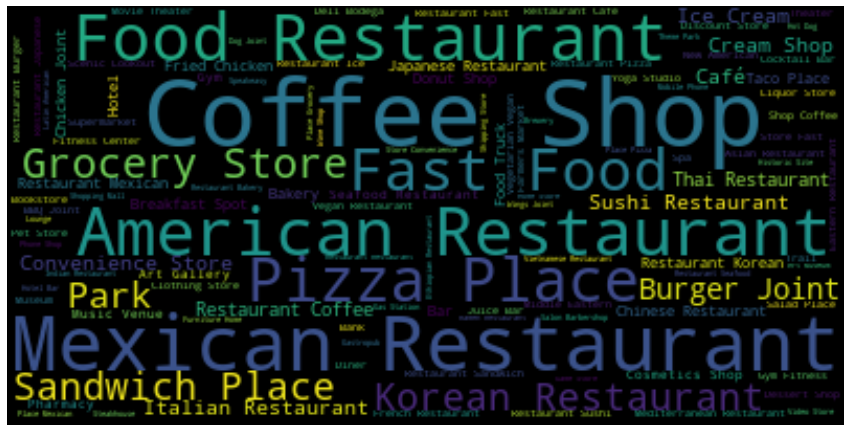

In [16]:
venue_cat = LA_venues['Venue Category']
text = " ".join(venue for venue in venue_cat)
wordcloud = WordCloud().generate(text)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

=> We can see that Coffee Shop has a big font size which means there are a lot of Coffee Shop in all of the neighborhoods. Besides, we also see cafe in the generated word cloud above, so we should change all categories that are synonyms of Coffee to Coffee Shop.

In [17]:
LA_venues['Venue Category'] = LA_venues['Venue Category'].replace('Cafeteria', 'Coffee Shop')
LA_venues['Venue Category'] = LA_venues['Venue Category'].replace('College Cafeteria', 'Coffee Shop')
LA_venues['Venue Category'] = LA_venues['Venue Category'].replace('Café', 'Coffee Shop')

In [18]:
LA_venues['Coffee Shop'] = LA_venues['Venue Category'].mask(LA_venues['Venue Category'].ne('Coffee Shop'))
LA_group= LA_venues.groupby('Neighborhood')['Coffee Shop'].count().reset_index()
LA_group.head()

,Neighborhood,Coffee Shop
0,"Angeles Mesa, Los Angeles",1
1,"Angelino Heights, Los Angeles",13
2,"Angelus Vista, Los Angeles",6
3,"Arleta, Los Angeles",0
4,"Arlington Heights, Los Angeles",6


In [21]:
# Create a df for Coffee Shop data only
LA_coffee = LA_group[['Neighborhood','Coffee Shop']]
LA_coffee = pd.merge(LA_coffee, num_venue_neigh, on = 'Neighborhood', how = 'inner')
#LA_coffee.rename(columns = {'Venue Category': 'Coffee Shop'}, inplace = True)
LA_coffee['Percent'] = LA_coffee['Coffee Shop']*100/LA_coffee['Total Venue']
LA_coffee.head()

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent
0,"Angeles Mesa, Los Angeles",1,75,Medium,1.333333
1,"Angelino Heights, Los Angeles",13,100,Large,13.000000
2,"Angelus Vista, Los Angeles",6,100,Large,6.000000
3,"Arleta, Los Angeles",0,52,Medium,0.000000
4,"Arlington Heights, Los Angeles",6,100,Large,6.000000


#### Let's review the tables for the next section

In [22]:
neigh_LA.head()

,Neighborhood,Latitude,Longitude
0,"Angelino Heights, Los Angeles",34.070278,-118.254722
1,"Angeles Mesa, Los Angeles",33.994200,-118.313600
2,"Angelus Vista, Los Angeles",34.046954,-118.317488
3,"Arleta, Los Angeles",34.241944,-118.425556
4,"Arlington Heights, Los Angeles",34.042222,-118.318889


In [23]:
LA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Coffee Shop
0,"Angelino Heights, Los Angeles",34.070278,-118.254722,Guisados,Taco Place,NaN
1,"Angelino Heights, Los Angeles",34.070278,-118.254722,Halliwell Manor,Performing Arts Venue,NaN
2,"Angelino Heights, Los Angeles",34.070278,-118.254722,Eightfold Coffee,Coffee Shop,Coffee Shop
3,"Angelino Heights, Los Angeles",34.070278,-118.254722,Subliminal Projects,Art Gallery,NaN
4,"Angelino Heights, Los Angeles",34.070278,-118.254722,Button Mash,Arcade,NaN


In [24]:
LA_coffee.head()

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent
0,"Angeles Mesa, Los Angeles",1,75,Medium,1.333333
1,"Angelino Heights, Los Angeles",13,100,Large,13.000000
2,"Angelus Vista, Los Angeles",6,100,Large,6.000000
3,"Arleta, Los Angeles",0,52,Medium,0.000000
4,"Arlington Heights, Los Angeles",6,100,Large,6.000000


## 3. Methodology <a name="methodology"></a>

There are two parts in this section
- Firstly, we will do some exploratory data analyis
- Secondly, we will perform K-mean clustering on our data

### 3.1 Exploratory data analyis

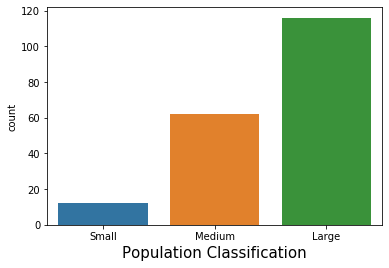

In [25]:
sns.countplot('Population Classification', data = num_venue_neigh)
plt.xlabel('Population Classification', fontsize = 15)
plt.show()

=> There are about 30 neighborhoods that have few venues which is considered as low population   
=> There are about 7 neighborhoods that has more than 100 venues which implies that these neighborhoods has many residents

#### Let see which neighborhood has a low number of venues

In [26]:
num_venue_neigh[num_venue_neigh['Population Classification'] == 'Small']

,Neighborhood,Total Venue,Population Classification
13,"Benedict Canyon, Los Angeles",20,Small
14,"Beverly Crest, Los Angeles",10,Small
15,"Beverly Glen, Los Angeles",7,Small
18,"Beverly Park, Los Angeles",13,Small
19,"Beverlywood, Los Angeles",5,Small
24,"Broadway-Manchester, Los Angeles",29,Small
80,"Hollywood Hills West, Los Angeles",27,Small
81,"Holmby Hills, Los Angeles",18,Small
90,"Lake View Terrace, Los Angeles",9,Small
92,"Laurel Canyon, Los Angeles",20,Small


In [27]:
len(LA_venues['Venue Category'].explode().unique())

415

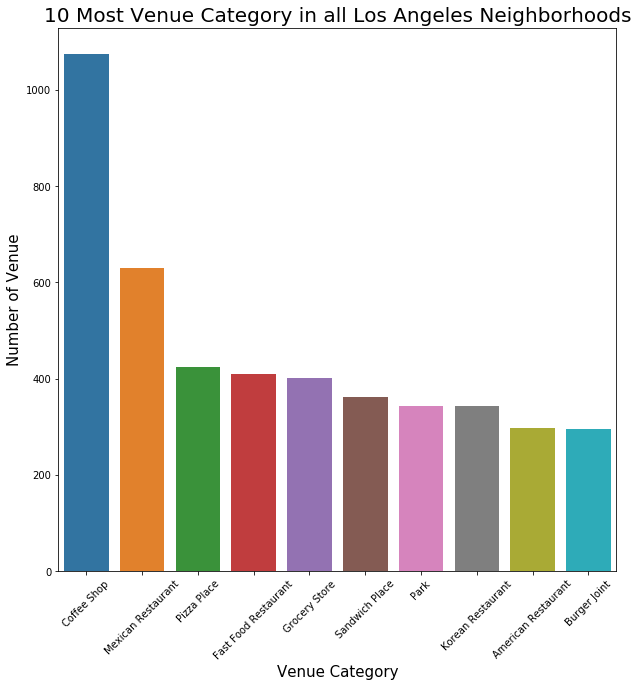

In [28]:
top_num_venue = LA_venues.groupby('Venue Category').count().sort_values('Venue', ascending = False).reset_index()
top_num_venue = top_num_venue.head(10)
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Venue Category', y = 'Venue', data = top_num_venue)
plt.xlabel('Venue Category', fontsize = 15)
plt.ylabel('Number of Venue', fontsize = 15)
plt.xticks(rotation = 45)
plt.title('10 Most Venue Category in all Los Angeles Neighborhoods', fontsize = 20)
plt.show()

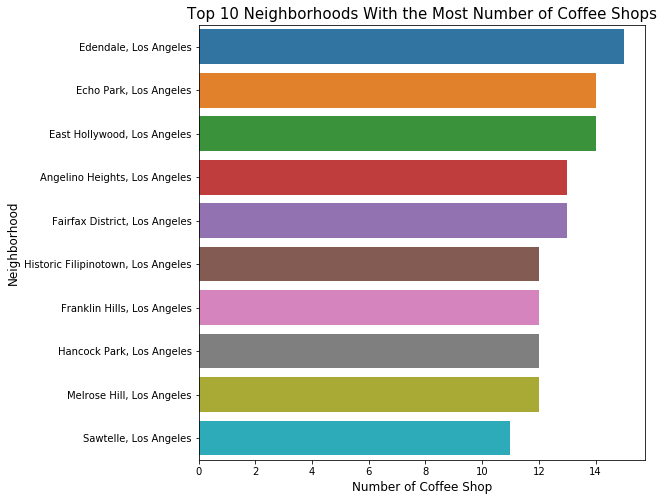

In [29]:
top_num_coffee = LA_coffee.sort_values('Coffee Shop', ascending = False).reset_index()
top_num_coffee = top_num_coffee.head(10)
bottom_num_coffee = top_num_coffee.tail(10)
plt.rcParams['figure.figsize'] = (8,8)
sns.barplot(y = 'Neighborhood', x = 'Coffee Shop', data = top_num_coffee)
plt.ylabel('Neighborhood', fontsize = 12)
plt.xlabel('Number of Coffee Shop', fontsize = 12)
#plt.xticks(rotation = 90)
plt.title('Top 10 Neighborhoods With the Most Number of Coffee Shops', fontsize = 15)
plt.show()

### 3.2 Preparing data for Kmeans clustering

In [30]:
LA_grouped_clustering = LA_coffee[['Percent']]
#LA_grouped_clustering = LA_onehot['Coffee Shop']
LA_grouped_clustering.head()

,Percent
0,1.333333
1,13.000000
2,6.000000
3,0.000000
4,6.000000


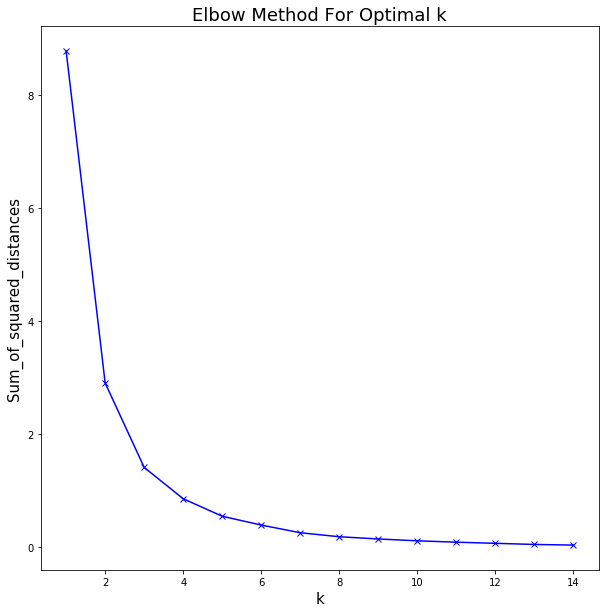

In [31]:
mms = MinMaxScaler()
mms.fit(LA_grouped_clustering)
data_transformed = mms.transform(LA_grouped_clustering)
#data_transformed = mms.transform(LA_grouped_clustering.values.reshape(-1, 1))
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    #km = km.fit(LA_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Sum_of_squared_distances', fontsize = 15)
plt.title('Elbow Method For Optimal k', fontsize = 18)
plt.show()

In [32]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 0, 1, 0, 2, 0, 1, 0, 0])

## 4. Results & Discussion <a name="results"></a>

In [33]:
LA_merge = LA_coffee.copy()
# Add clustering labels
LA_merge['Cluster Label'] = kmeans.labels_
LA_merge.head()

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent,Cluster Label
0,"Angeles Mesa, Los Angeles",1,75,Medium,1.333333,1
1,"Angelino Heights, Los Angeles",13,100,Large,13.000000,2
2,"Angelus Vista, Los Angeles",6,100,Large,6.000000,0
3,"Arleta, Los Angeles",0,52,Medium,0.000000,1
4,"Arlington Heights, Los Angeles",6,100,Large,6.000000,0


In [34]:
LA_final = pd.merge(LA_merge, neigh_LA, how = 'inner', on = 'Neighborhood')

In [35]:
LA_final.head()

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent,Cluster Label,Latitude,Longitude
0,"Angeles Mesa, Los Angeles",1,75,Medium,1.333333,1,33.994200,-118.313600
1,"Angelino Heights, Los Angeles",13,100,Large,13.000000,2,34.070278,-118.254722
2,"Angelus Vista, Los Angeles",6,100,Large,6.000000,0,34.046954,-118.317488
3,"Arleta, Los Angeles",0,52,Medium,0.000000,1,34.241944,-118.425556
4,"Arlington Heights, Los Angeles",6,100,Large,6.000000,0,34.042222,-118.318889


In [91]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['blue','yellow','red']
#rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_final['Latitude'], LA_final['Longitude'], LA_final['Neighborhood'], LA_final['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

We visualize the results of the clustering in the map with cluster 0 in red color, cluster 1 in blue color, and cluster 2 in yellow color.

#### Examining Cluster 0

In [81]:
cluster_0 = LA_final[LA_final['Cluster Label'] == 0].sort_values(['Coffee Shop','Total Venue','Population Classification'], ascending = True)
cluster_0.head()

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent,Cluster Label,Latitude,Longitude
13,"Benedict Canyon, Los Angeles",1,20,Small,5.000000,0,34.097789,-118.430706
92,"Laurel Canyon, Los Angeles",1,20,Small,5.000000,0,34.117275,-118.375281
171,"Watts, Los Angeles",2,34,Medium,5.882353,0,33.941667,-118.241667
151,"Sunland-Tujunga, Los Angeles",3,46,Medium,6.521739,0,34.252220,-118.287500
108,"Mission Hills, Los Angeles",3,53,Medium,5.660377,0,34.257222,-118.467222


In [43]:
print('There are {} in cluster 0'.format(len(LA_final[LA_final['Cluster Label'] == 0])))

There are 78 in cluster 0


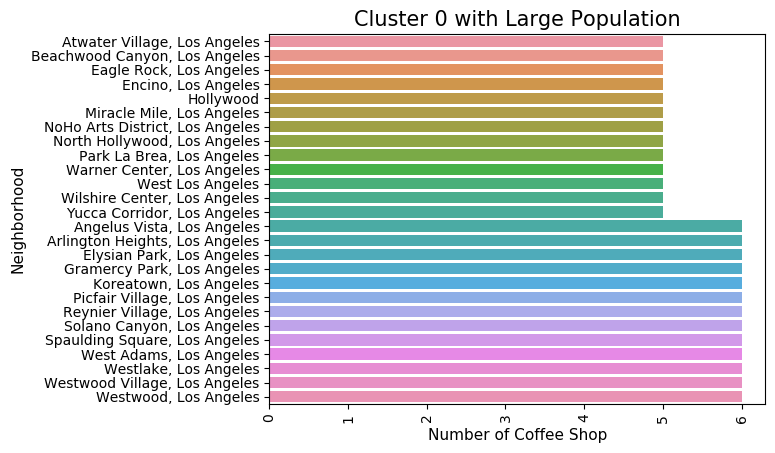

In [88]:
cluster_1 = LA_final[LA_final['Cluster Label'] == 1].sort_values(['Coffee Shop','Total Venue','Population Classification'], ascending = True)
cluster_1.head()
large = cluster_0[(cluster_0['Population Classification'] == 'Large') & (cluster_0['Coffee Shop'] <= 6)]
plt.rcParams['figure.figsize'] = (15,15)
plt.style.use('default')
sns.barplot(y = 'Neighborhood', x ='Coffee Shop', data = large)
plt.xlabel('Number of Coffee Shop', fontsize = 11)
plt.xticks(rotation = 90)
plt.ylabel('Neighborhood', fontsize = 11)
plt.title('Cluster 0 with Large Population', fontsize = 15)
plt.show()

#### Examing Cluster 1

In [45]:
print('There are {} in cluster 1'.format(len(LA_final[LA_final['Cluster Label'] == 1])))

There are 60 in cluster 1


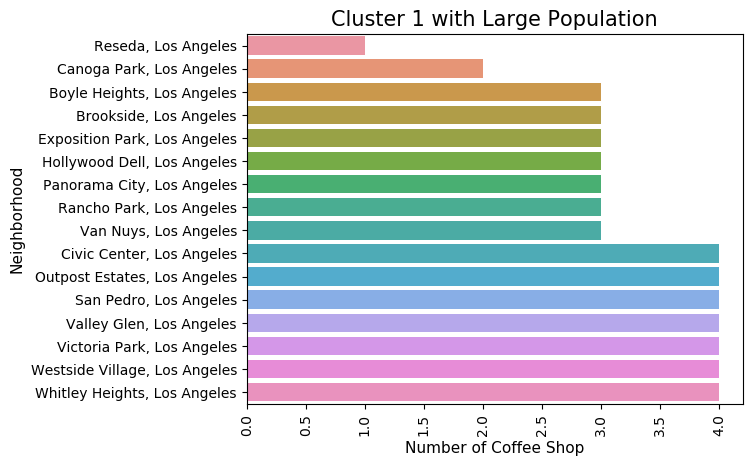

In [80]:
large = cluster_1[cluster_1['Population Classification'] == 'Large']
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('default')
sns.barplot(y = 'Neighborhood', x ='Coffee Shop', data = large)
plt.xlabel('Number of Coffee Shop', fontsize = 11)
plt.xticks(rotation = 90)
plt.ylabel('Neighborhood', fontsize = 11)
plt.title('Cluster 1 with Large Population', fontsize = 15)
plt.show()

#### Examing Cluster 2

In [46]:
LA_final[LA_final['Cluster Label'] == 2].sort_values(['Coffee Shop','Total Venue','Population Classification'], ascending = True)

,Neighborhood,Coffee Shop,Total Venue,Population Classification,Percent,Cluster Label,Latitude,Longitude
81,"Holmby Hills, Los Angeles",2,18,Small,11.111111,2,34.089559,-118.424034
12,"Bel Air, Los Angeles",4,33,Medium,12.121212,2,34.083330,-118.447780
101,"Mandeville Canyon, Los Angeles",5,45,Medium,11.111111,2,34.063056,-118.496389
68,"Harbor City, Los Angeles",6,65,Medium,9.230769,2,33.790000,-118.296940
72,"Hermon, Los Angeles",7,75,Medium,9.333333,2,34.103906,-118.185077
51,"Elysian Valley, Los Angeles",8,86,Medium,9.302326,2,34.094450,-118.240366
16,"Beverly Grove, Los Angeles",9,100,Large,9.000000,2,34.074037,-118.376355
21,"Brentwood Circle, Los Angeles",9,100,Large,9.000000,2,34.051940,-118.464000
35,"Cheviot Hills, Los Angeles",9,100,Large,9.000000,2,34.036389,-118.401667
36,"Chinatown, Los Angeles",9,100,Large,9.000000,2,34.062888,-118.237890


In [47]:
print('There are {} in cluster 0'.format(len(LA_final[LA_final['Cluster Label'] == 2])))

There are 52 in cluster 0


- Cluster 0: Neighborhoods that have a moderate number of coffee shops. Each neighborhood has between 1 to 8 coffee shops. It takes 4% to 8% of the total of those neighborhoods’ venues.
- Cluster 1: Neighborhoods that have the fewest number of coffee shops. There are less than 8 coffee shops in each neighborhood. It takes 0% to 4% of the total of those neighborhoods’ venues.
- Cluster 2: Neighborhoods that have a high number of coffee shops. The number of coffee shops in each neighborhood is between 2 to 15. It takes 9% to 16% of the total of those neighborhoods’ venues.


- The moderate and high percent number of coffee shops are concentrated in the center of Los Angeles.  
  
Cluster 1 (blue) has a very low percentage of coffee shops. This represents a great opportunity and high potential location to open a new coffee shop because there is very little to no competition to open a new coffee shop. As mentioned, the neighborhoods that have more than 100 venues are considered as large populations. From the graph in Cluster 1 above, we see that Reseda is a good neighborhood to set up a new coffee shop as it only has one coffee shop but it has a large population.
  
Cluster 0 (red) can be chosen to open a new coffee shop if the population is large but the number of coffee shops is not too high. For example, Atwater Village has a large population but only 5 coffee shops. (Bar graph of Cluster 0)
  
Neighborhoods in cluster 2 (yellow) should be avoided setting up a new coffee shop since they already have a high concentration of coffee shops and may suffer from intense competition.


## 5.Conclusion <a name="conclusion"></a>

The purpose of this project is to assist our contractors/clients to find a neighborhood that their coffee shop should be set up in.  
  
After fetching data from several data sources, processing them into a clean data frame, and applying the K-means clustering algorithm, we visualized and recommended potential neighborhoods that have a few coffee shops but have a large population. The finding of this project will help our contractors or clients to consider high potential locations while avoiding overcrowded neighborhoods in their decisions to open a new coffee shop.
  
Nevertheless, to open a coffee shop, we also need to consider other factors such as the cost of rent, the population of the neighborhood, etc. In this project, we classified the population of each neighborhood based on the number of venues in each neighborhood. Besides, this project made use of the free FourSquare API that came with limitations as to the number of API calls and results returned.  For future work, we can build a better recommendation if we have more fields and more data for our K-means clustering algorithm. 
